In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

4/4 [==============================] - 1s 99ms/step


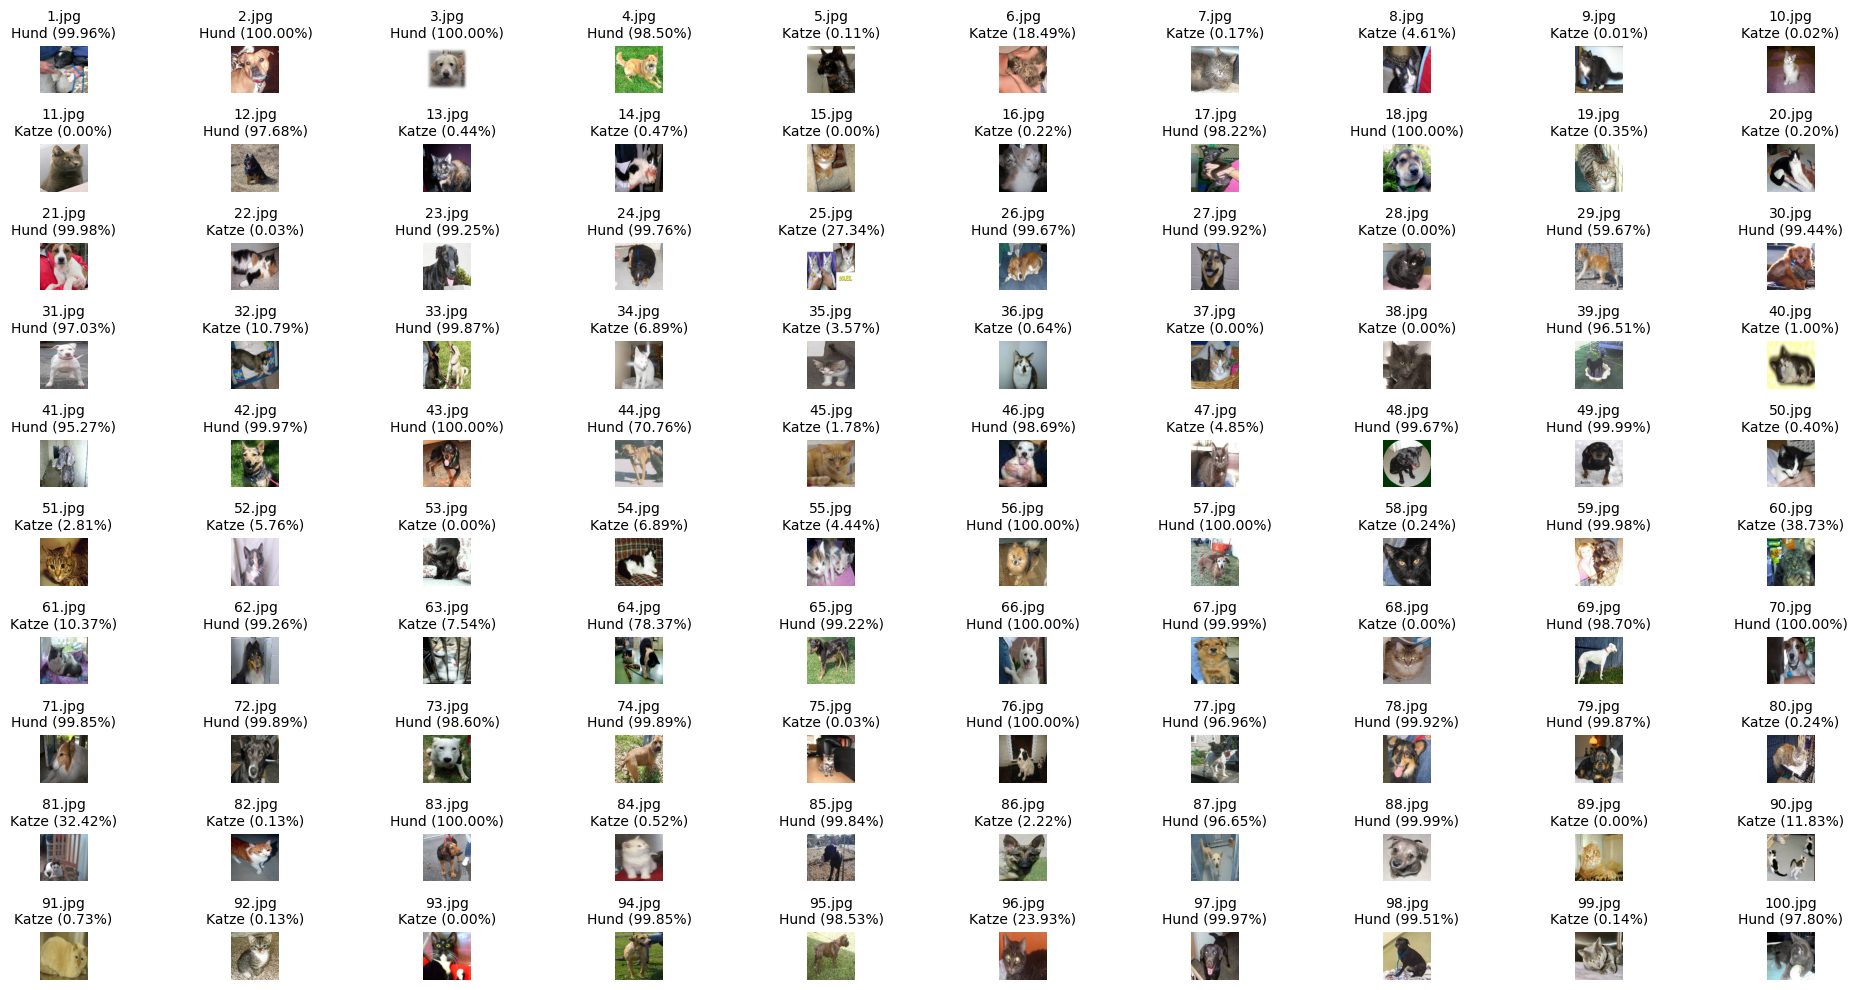

In [17]:
test_folder = "test1/"
image_files = [f"{i}.jpg" for i in range(1, 101)]  

test_images = []
file_names = []

# Bilder laden und vorbereiten
for img_name in image_files:
    img_path = os.path.join(test_folder, img_name)
    img = image.load_img(img_path, target_size=(128, 128))  # Bildgröße an Modell anpassen
    img_array = image.img_to_array(img) / 255.0  # Normierung der Pixelwerte
    test_images.append(img_array)
    file_names.append(img_name)

# In NumPy-Array umwandeln
test_images = np.array(test_images)

model = tf.keras.models.load_model('CNN_model.keras')  

# Vorhersagen mit dem Modell
predictions = model.predict(test_images)

# Ergebnisse anzeigen
plt.figure(figsize=(20, 10))
for i, (img_array, pred, fname) in enumerate(zip(test_images, predictions, file_names)):
    plt.subplot(10, 10, i+1)  # Raster 4x5 für 20 Bilder
    plt.imshow(img_array)
    plt.axis("off")
    
    # Label basierend auf der Vorhersage
    label = "Hund" if pred > 0.5 else "Katze"
    confidence = float(pred[0])  # Konvertiere das Prediction-Array zu einem Float-Wert
    
    # Anzeige mit Confidence-Score
    plt.title(f"{fname}\n{label} ({confidence:.2%})", fontsize=10)

plt.tight_layout()
plt.show()